In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score , mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import pointbiserialr

In [4]:
path = "C:/Users/HP/OneDrive/Documents/molecular_descriptor_training.csv"
data = pd.read_csv(path)
print(data.head(5))

           Name   AATSC5e    MATS5e      JGI9     JGI10          IC50  FP169  \
0  anti_NIV_001 -0.011084 -0.074365  0.009018  0.009241  2.880000e-08      1   
1  anti_NIV_002  0.013893  0.126755  0.009214  0.007332  3.240000e-08      1   
2  anti_NIV_003 -0.002703 -0.023649  0.010379  0.007696  5.010000e-08      1   
3  anti_NIV_004  0.005026  0.058806  0.008525  0.008948  7.080000e-08      1   
4  anti_NIV_005  0.009286  0.053779  0.006953  0.019250  1.200000e-07      1   

   FP204  FP339  FP396  ...  KRFP2135  KRFP3940  KRFPC349  KRFPC2135  \
0      1      1      1  ...         0         0         0          0   
1      1      0      1  ...         0         0         0          0   
2      0      1      0  ...         0         0         0          0   
3      1      0      1  ...         0         0         0          0   
4      0      1      0  ...         0         0         0          0   

   KRFPC2694  KRFPC3139  KRFPC3520  KRFPC4292  PIC50  Unnamed: 45  
0          0      

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         95 non-null     object 
 1   AATSC5e      95 non-null     float64
 2   MATS5e       95 non-null     float64
 3   JGI9         95 non-null     float64
 4   JGI10        95 non-null     float64
 5   IC50         95 non-null     float64
 6   FP169        95 non-null     int64  
 7   FP204        95 non-null     int64  
 8   FP339        95 non-null     int64  
 9   FP396        95 non-null     int64  
 10  FP490        95 non-null     int64  
 11  FP551        95 non-null     int64  
 12  FP582        95 non-null     int64  
 13  FP606        95 non-null     int64  
 14  ExtFP79      95 non-null     int64  
 15  ExtFP442     95 non-null     int64  
 16  ExtFP584     95 non-null     int64  
 17  ExtFP700     95 non-null     int64  
 18  ExtFP1010    95 non-null     int64  
 19  ExtFP1019 

In [6]:
print(data.describe())

         AATSC5e     MATS5e       JGI9      JGI10          IC50      FP169  \
count  95.000000  95.000000  95.000000  95.000000  9.500000e+01  95.000000   
mean   -0.001660  -0.012550   0.007473   0.006068  1.708311e-04   0.231579   
std     0.011951   0.120458   0.003979   0.003662  8.084501e-04   0.424079   
min    -0.038092  -0.321628   0.000000   0.000000  2.880000e-08   0.000000   
25%    -0.007117  -0.082280   0.006513   0.005199  1.480000e-06   0.000000   
50%    -0.001069  -0.010226   0.008667   0.006706  6.920000e-06   0.000000   
75%     0.004371   0.051394   0.009974   0.007960  8.305000e-05   0.000000   
max     0.040137   0.273579   0.017143   0.019250  7.585776e-03   1.000000   

           FP204      FP339      FP396      FP490  ...   KRFP2135   KRFP3940  \
count  95.000000  95.000000  95.000000  95.000000  ...  95.000000  95.000000   
mean    0.600000   0.115789   0.115789   0.052632  ...   0.010526   0.073684   
std     0.492497   0.321670   0.321670   0.224481  ...   

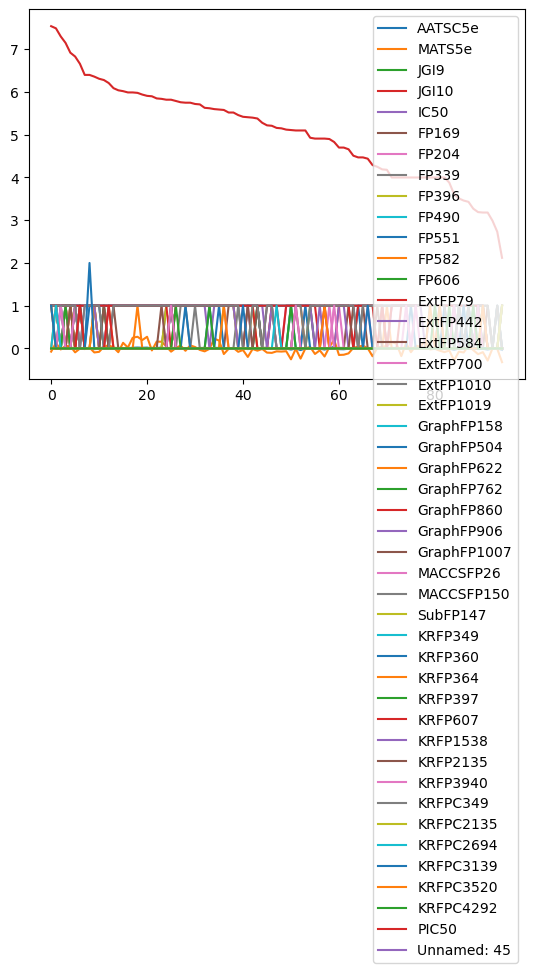

In [7]:
data.plot()
plt.show()

          AATSC5e    MATS5e      JGI9     JGI10      IC50     PIC50
AATSC5e  1.000000  0.935089  0.185802  0.265719 -0.300984  0.253167
MATS5e   0.935089  1.000000  0.212903  0.277034 -0.295137  0.290328
JGI9     0.185802  0.212903  1.000000  0.674604 -0.269473  0.321213
JGI10    0.265719  0.277034  0.674604  1.000000 -0.239567  0.373125
IC50    -0.300984 -0.295137 -0.269473 -0.239567  1.000000 -0.439653
PIC50    0.253167  0.290328  0.321213  0.373125 -0.439653  1.000000


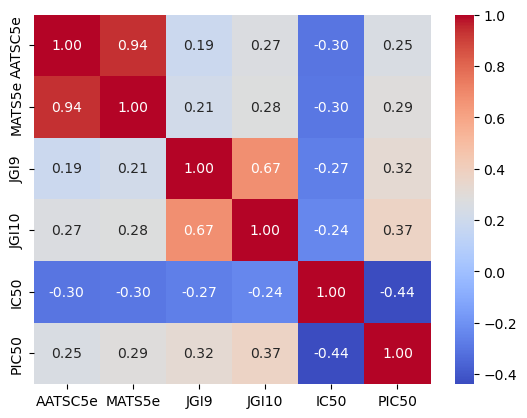

In [55]:
#print(data[['AATSC5e' ,'MATS5e', 'JGI9','JGI10' , 'IC50']])
correlation_matrix_continous = data[['AATSC5e' ,'MATS5e', 'JGI9','JGI10' , 'IC50','PIC50']].corr()
print(correlation_matrix_continous)

sns.heatmap(correlation_matrix_continous, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

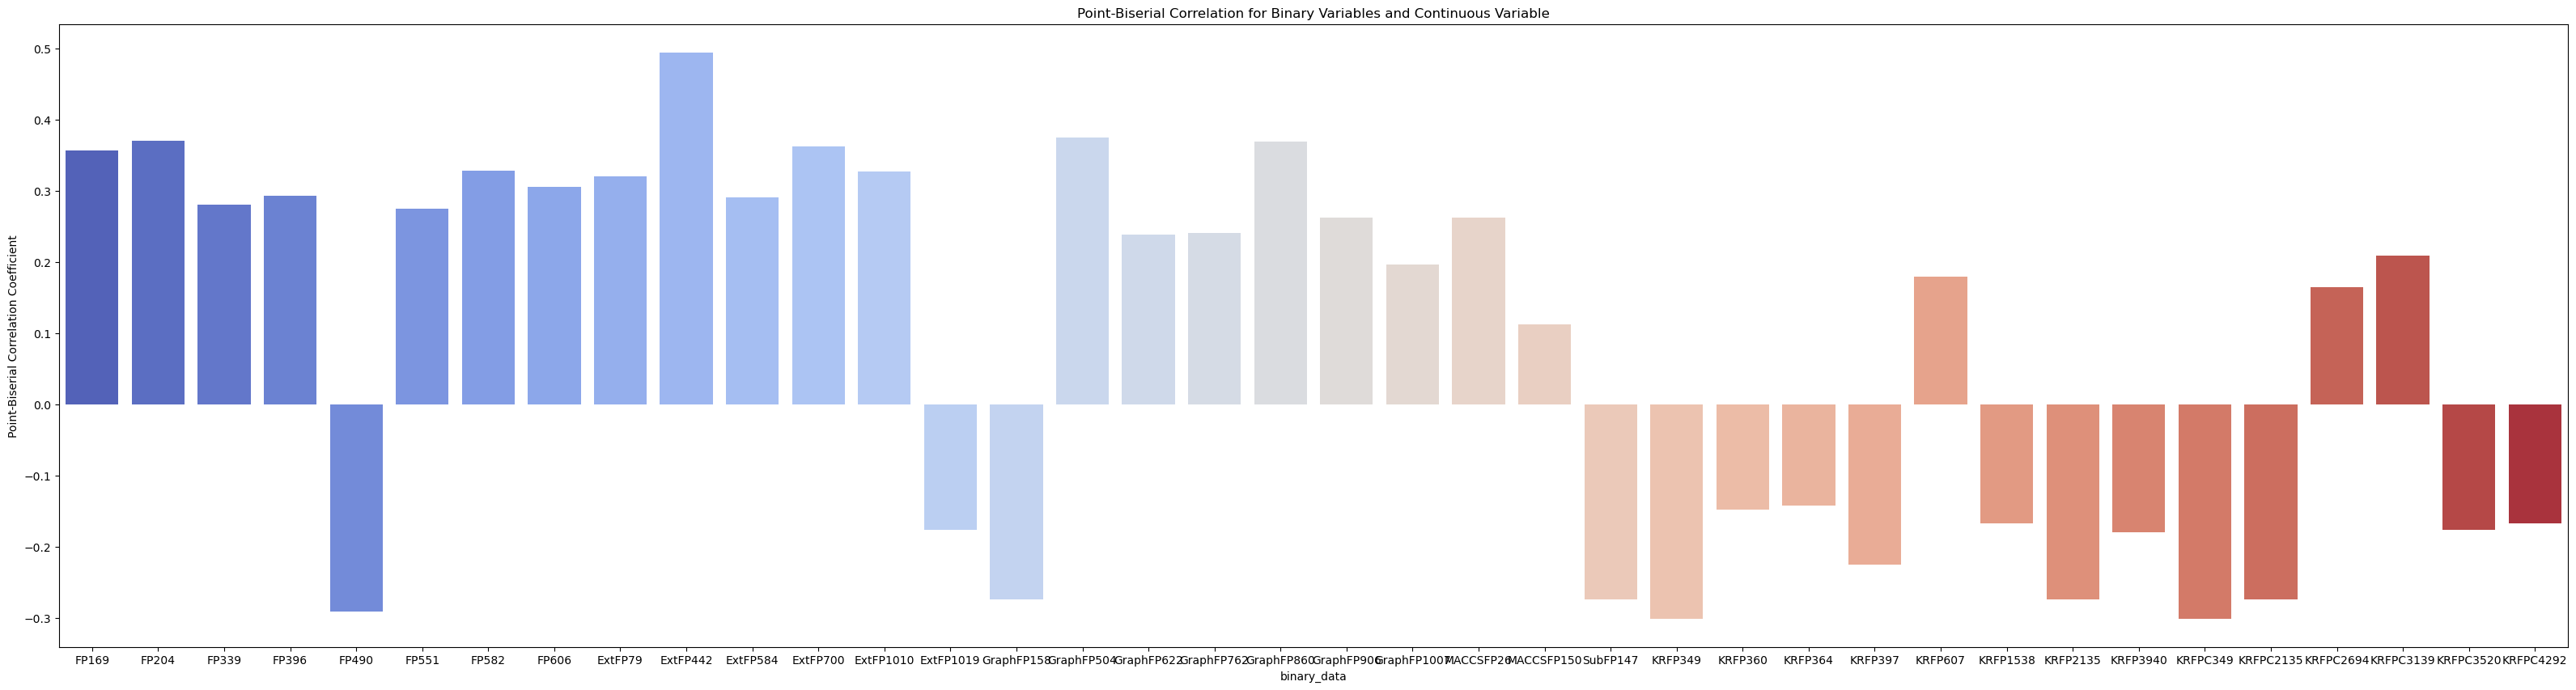

In [9]:
#print(data.columns[7:44])
column_names = ['binary_data','Point-Biserial_Correlation','p-value' ]

binary_to_continous_correlation = pd.DataFrame(columns=column_names)
count=0
for column in data.columns[6:44]:
        #print(type(i))
        correlation_matrix_binary, p_value= pointbiserialr(data[column], data['PIC50'])
        #print(f'Point-Biserial Correlation: {column} {correlation_matrix_binary:.2f}')
        #print(f'p-value: {p_value:.4f}')
        count +=1
        p_value *= 10**-4
        binary_to_continous_correlation.loc[count]=[column,correlation_matrix_binary,p_value]       
#print(binary_to_continous_correlation)
'''sns.scatterplot(x=binary_to_continous_correlation['Point-Biserial_Correlation'], y=data['PIC50'], data=data)
plt.title('Scatter Plot of Binary vs Continuous Variables')
plt.show()'''
plt.figure(figsize=(40, 10))
sns.barplot(x=binary_to_continous_correlation['binary_data'], y=binary_to_continous_correlation['Point-Biserial_Correlation'], palette="coolwarm")
plt.ylabel('Point-Biserial Correlation Coefficient')
plt.title('Point-Biserial Correlation for Binary Variables and Continuous Variable')
plt.show()

In [10]:
correlation_matrix_binary, p_value= pointbiserialr(data['PIC50'],data['FP169'])
print(f'Point-Biserial Correlation: {correlation_matrix_binary:.2f}')
print(f'p-value: {p_value:.4f}')

Point-Biserial Correlation: 0.36
p-value: 0.0004


In [11]:
X = data.drop(columns=['PIC50','Name'])
y = data['PIC50']


X_train_test, X_validation, y_train_test, y_validation = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [12]:
X = data.drop(columns=['PIC50','Name'])
y = data['PIC50']


X_train_test, X_validation, y_train_test, y_validation = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [13]:
X_train_test = X_train_test.drop(columns=['Unnamed: 45'])

In [14]:
X_train_test

,AATSC5e,MATS5e,JGI9,JGI10,IC50,FP169,FP204,FP339,FP396,FP490,...,KRFP607,KRFP1538,KRFP2135,KRFP3940,KRFPC349,KRFPC2135,KRFPC2694,KRFPC3139,KRFPC3520,KRFPC4292
4,0.009286,0.053779,0.006953,0.019250,1.200000e-07,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0.020438,0.273579,0.007938,0.007428,1.050000e-06,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,-0.004626,-0.054709,0.006615,0.005494,1.780000e-06,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,-0.002467,-0.078931,0.000000,0.000000,3.470000e-06,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0.000263,0.005214,0.007378,0.007187,3.630000e-05,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.016525,-0.153015,0.012884,0.008086,2.000000e-05,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0.012008,0.149885,0.000000,0.000000,1.000000e-04,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,-0.009456,-0.087676,0.011505,0.006706,9.120000e-07,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0.000000,0.000000,0.000000,0.000000,1.023293e-03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_validation = X_validation.drop(columns=['Unnamed: 45'])

In [16]:
X_validation


,AATSC5e,MATS5e,JGI9,JGI10,IC50,FP169,FP204,FP339,FP396,FP490,...,KRFP607,KRFP1538,KRFP2135,KRFP3940,KRFPC349,KRFPC2135,KRFPC2694,KRFPC3139,KRFPC3520,KRFPC4292
68,0.000370,0.019155,0.010014,0.008003,5.620000e-05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0.012641,0.160222,0.009292,0.009192,1.410000e-06,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0.009554,0.110152,0.000000,0.000000,1.000000e-04,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,-0.007076,-0.179043,0.009643,0.006360,1.000000e-04,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.011084,-0.074365,0.009018,0.009241,2.880000e-08,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
26,0.000731,0.010075,0.011337,0.007878,1.620000e-06,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,-0.002141,-0.036851,0.011000,0.008847,3.800000e-06,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42,-0.001598,-0.013263,0.009303,0.007612,3.980000e-06,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,-0.008373,-0.079205,0.011204,0.009609,4.900000e-07,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,-0.007900,-0.097393,0.017143,0.000000,6.030000e-06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train_test


4     6.92
18    5.98
28    5.75
39    5.46
66    4.44
      ... 
60    4.70
71    4.00
14    6.04
92    2.99
51    5.10
Name: PIC50, Length: 80, dtype: float64

In [18]:
y_validation

68    4.25
22    5.85
72    4.00
73    4.00
0     7.54
26    5.79
40    5.42
42    5.40
10    6.31
45    5.22
84    3.61
55    4.91
81    4.00
47    5.16
12    6.21
Name: PIC50, dtype: float64

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_test)
X_validation_scaled = scaler.transform(X_validation)

In [20]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Split the dataset into training and testing sets

# Create an instance of the linear regression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train_test, y_train_test)

# Make predictions on the test set
y_pred = regression_model.predict(X_validation)

# Evaluate the model's performance
mse = mean_squared_error(y_validation, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_pred, y_validation))

Mean Squared Error: 0.75
r2_score: 0.4856451827726368


In [21]:
coefficients = pd.Series(regression_model.coef_, index=X_validation.columns)
print('Coefficients:')
print(coefficients)

Coefficients:
AATSC5e         22.377517
MATS5e          -0.579925
JGI9            70.556282
JGI10          -64.590165
IC50          -329.963432
FP169            0.334154
FP204            0.232767
FP339            0.527968
FP396            0.090601
FP490           -0.175544
FP551           -0.141860
FP582            0.728274
FP606            0.287985
ExtFP79          0.210792
ExtFP442         0.519757
ExtFP584         0.353455
ExtFP700         0.254473
ExtFP1010        0.623069
ExtFP1019       -0.317753
GraphFP158       0.410972
GraphFP504      -0.373020
GraphFP622       0.550955
GraphFP762       0.615739
GraphFP860       0.986462
GraphFP906       0.278717
GraphFP1007      0.536009
MACCSFP26        0.278717
MACCSFP150      -0.421615
SubFP147         0.410972
KRFP349         -0.513712
KRFP360         -0.567840
KRFP364         -0.456487
KRFP397         -0.575731
KRFP607          0.960076
KRFP1538        -0.544477
KRFP2135         0.410972
KRFP3940        -0.872731
KRFPC349        -0.51371

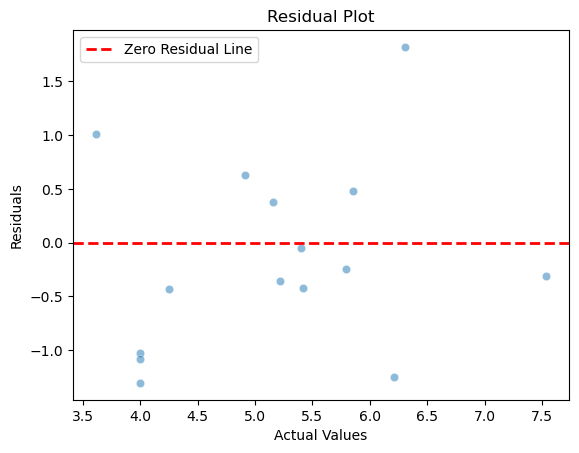

In [22]:
residuals = y_validation - y_pred
residuals
sns.scatterplot(x=y_validation, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')

plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 0.72
R-squared (R2): 0.32
Mean Squared Error: 0.7493339635394987


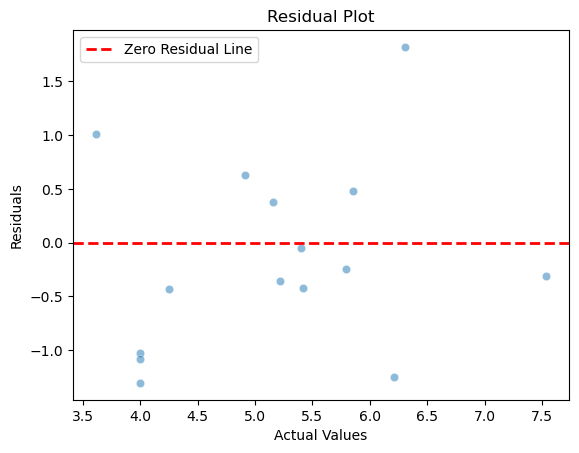

In [59]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model1.fit(X_train_test, y_train_test)

# Make predictions on the test set
y_pred1= regression_model.predict(X_validation)
mae = mean_absolute_error(y_validation, y_pred1)

r2 = r2_score(y_validation, y_pred1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R-squared (R2): {r2:.2f}")
mse = mean_squared_error(y_validation, y_pred1)
print(f"Mean Squared Error: {mse}")

residuals = y_validation - y_pred1
residuals
sns.scatterplot(x=y_validation, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')

plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [24]:
feature_importances = model1.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


AATSC5e: 1.2082915298615416e-05
MATS5e: 0.00040747681080409654
JGI9: 0.004151074516208592
JGI10: 0.00011539065882170874
IC50: 0.9922243074492582
FP169: 0.0
FP204: 0.00022937676740980573
FP339: 4.965581627610521e-07
FP396: 0.0
FP490: 0.0
FP551: 1.4113031822838126e-16
FP582: 4.022121119952238e-05
FP606: 0.0
ExtFP79: 1.6022276724456602e-05
ExtFP442: 2.6814140797564633e-06
ExtFP584: 0.00046494395991427214
ExtFP700: 6.620775507714604e-07
ExtFP1010: 0.0
ExtFP1019: 0.0
GraphFP158: 0.0
GraphFP504: 0.0
GraphFP622: 7.9449306072817e-06
GraphFP762: 0.0
GraphFP860: 0.0
GraphFP906: 0.00011172558666541051
GraphFP1007: 2.648310202450755e-06
MACCSFP26: 0.0
MACCSFP150: 0.0003105143712352694
SubFP147: 0.0
KRFP349: 0.0
KRFP360: 0.0
KRFP364: 0.0
KRFP397: 6.620775506126888e-07
KRFP607: 0.0
KRFP1538: 0.0
KRFP2135: 0.0018476929243601491
KRFP3940: 5.4075183946306795e-05
KRFPC349: 0.0
KRFPC2135: 0.0
KRFPC2694: 0.0
KRFPC3139: 0.0
KRFPC3520: 0.0
KRFPC4292: 0.0


[ 4  2 35 15  1 27  6  3 24 36 11 13  0 21 14 25 16 32  7 10 12 40 39 38
 37  5 34  8  9 33 28 29 31 17 18 19 20 41 22 23 30 26 42]


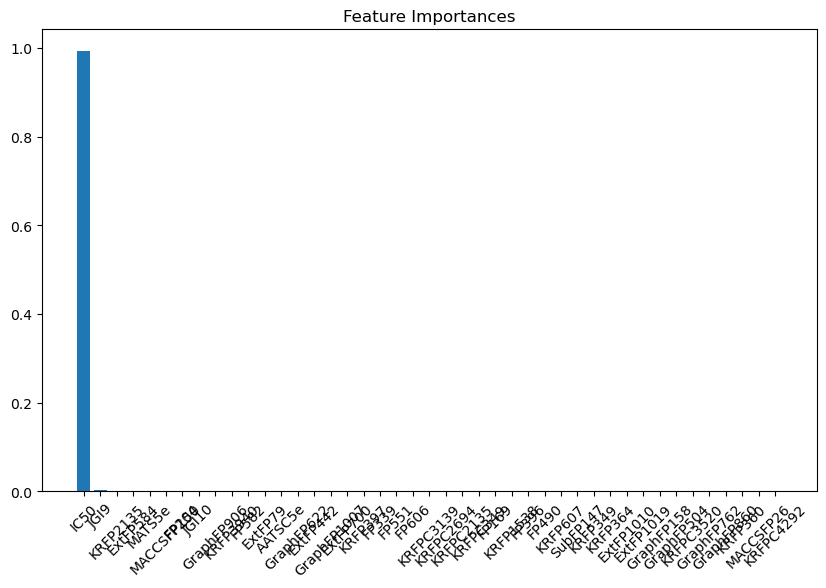

In [25]:
import matplotlib.pyplot as plt

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
print(indices)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_validation.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_validation.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [32]:
from sklearn.feature_selection import RFE
model2 = DecisionTreeRegressor(random_state=42)
num_features_to_select = 10
rfe = RFE(estimator=model2, n_features_to_select=num_features_to_select)
rfe.fit(X_train_test, y_train_test)
selected_features = X_validation.columns[rfe.support_]
print("Selected Features:", selected_features)

model2.fit(X_train_test[selected_features], y_train_test)
y_pred2 = model2.predict(X_validation[selected_features])
mse = mean_squared_error(y_validation, y_pred2)
print(f"Mean Squared Error with Selected Features: {mse}")

Selected Features: Index(['AATSC5e', 'MATS5e', 'JGI9', 'JGI10', 'IC50', 'FP204', 'MACCSFP150',
       'KRFP364', 'KRFP397', 'KRFP2135'],
      dtype='object')
Mean Squared Error with Selected Features: 0.010026666666666673


In [38]:
print(y_validation); print( y_pred2 )

68    4.25
22    5.85
72    4.00
73    4.00
0     7.54
26    5.79
40    5.42
42    5.40
10    6.31
45    5.22
84    3.61
55    4.91
81    4.00
47    5.16
12    6.21
Name: PIC50, dtype: float64
[4.51 5.84 4.   4.   7.3  5.82 5.41 5.41 6.36 5.21 3.51 4.83 4.   5.15
 6.28]


In [60]:
model3 = DecisionTreeRegressor(random_state=42)
cv_scores = cross_val_score(model3, X[selected_features], y, cv=10, scoring='neg_mean_squared_error')
#print("Cross-validated MSE scores:", cv_scores)
#print("Mean MSE:", np.mean(cv_scores))
#print("Standard Deviation of MSE:", np.std(cv_scores))
model3.fit(X_train_test[selected_features], y_train_test)
y_pred3 = model3.predict(X_validation[selected_features])
mae = mean_absolute_error(y_validation, y_pred3)

r2 = r2_score(y_validation, y_pred3)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R-squared (R2): {r2:.2f}")
mse = mean_squared_error(y_validation, y_pred3)
print(f"Mean Squared Error: {mse}")




Mean Absolute Error (MAE): 0.06
R-squared (R2): 0.99
Mean Squared Error: 0.010026666666666673


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


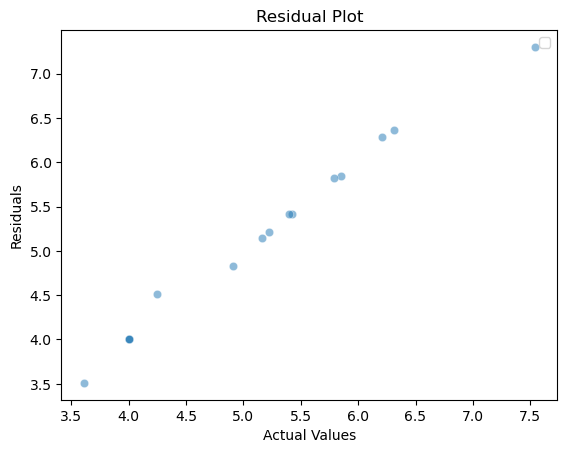

In [65]:
residuals = y_validation - y_pred3
residuals
sns.scatterplot(x=y_validation, y=y_pred3, alpha=0.5)
#plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [56]:
regressor = SVR(kernel='rbf', C=1.0)
cross_val_scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
regressor.fit(X_train_test[selected_features], y_train_test)

mae = mean_absolute_error(y_validation, y_pred1)

r2 = r2_score(y_validation, y_pred1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R-squared (R2): {r2:.2f}")
mse = mean_squared_error(y_validation, y_pred1)
print(f"Mean Squared Error: {mse}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packa

SVR()

In [57]:
y_pred2 = regressor.predict(X_validation[selected_features])
y_pred2

array([4.86600501, 5.74140531, 5.71385855, 5.43268531, 5.55601584,
       5.63957506, 5.23250626, 4.84267152, 5.5510382 , 4.77524068,
       4.60253916, 4.74734433, 4.08777235, 4.04165338, 5.26793539])

In [58]:
mae = mean_absolute_error(y_validation, y_pred2)
mse = mean_squared_error(y_validation, y_pred2)
r2 = r2_score(y_validation, y_pred2)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.75
Mean Squared Error (MSE): 0.91
R-squared (R2): 0.17


In [26]:
regressor = SVR(kernel='linear', C=1.0)
cross_val_scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
regressor.fit(X_train_scaled, y_train_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packa

SVR(kernel='linear')

In [ ]:
y_pred = regressor.predict(X_validation_scaled)


In [111]:
mse_scores = -cross_val_scores

# Print the cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):", cross_val_scores)
print("Mean MSE:", mse_scores.mean())

Cross-validation scores (Negative Mean Squared Error): [-0.66005001 -0.66284175 -0.21719454 -0.11697593 -0.47907352 -0.28238761
 -0.34458651 -1.32471945 -1.17511402 -1.01944515]
Mean MSE: 0.6282388484316092


In [112]:
mae = mean_absolute_error(y_validation, y_pred)
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.85
R-squared (R2): 0.22


In [103]:
y_pred

array([4.63686365, 5.5250091 , 5.67797149, 5.27549576, 7.41177959,
       5.84297374, 5.70823884, 5.51545216, 4.58816595, 5.68508468,
       2.93920183, 4.28265762, 5.1492604 , 4.79291606, 7.77934187])

In [36]:
regressor = SVR(kernel='rbf', C=1.0)
cross_val_scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
regressor.fit(X_train_scaled, y_train_test)

SVR()

In [37]:
y_pred = regressor.predict(X_validation_scaled)


In [38]:
mse_scores = -cross_val_scores

# Print the cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):", cross_val_scores)
print("Mean MSE:", mse_scores.mean())

Cross-validation scores (Negative Mean Squared Error): [-3.69473104 -0.69360659 -0.09284474 -0.19946803 -0.67268104 -0.26047892
 -0.2481298  -1.40322064 -1.45335048 -3.98838661]
Mean MSE: 1.2706897889912216


In [39]:
mae = mean_absolute_error(y_validation, y_pred)
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.94
R-squared (R2): 0.14


In [40]:
y_pred

array([4.59837359, 5.78789784, 5.14208775, 5.34358186, 5.1652979 ,
       5.88048773, 5.34052834, 5.5711054 , 4.59703966, 4.74176578,
       4.23581292, 4.43169449, 4.48949454, 4.82809841, 5.20640006])

In [41]:
y_validation

68    4.25
22    5.85
72    4.00
73    4.00
0     7.54
26    5.79
40    5.42
42    5.40
10    6.31
45    5.22
84    3.61
55    4.91
81    4.00
47    5.16
12    6.21
Name: PIC50, dtype: float64